In [110]:
import numpy as np
import matplotlib.pyplot as plt
import common_module as cm

In [111]:
#今回扱う関数の定義
def function(t,y):
      return np.exp(3*t) + 2*y

#初期値の設定
t0 = 1.3
y0 = 0.2

#刻み幅の設定
dt = 0.001

#計算回数の設定
n = 100

#計算用の配列を用意
history = np.zeros((0,2))

#初期値の履歴を追加
history = np.vstack((history,np.array([t0, y0])))

In [112]:
# ルンゲクッタ法
def RungeKutta(t, y,f):
      k1 = f(t, y)
      k2 = f(t + dt / 2, y + dt / 2 * k1)
      k3 = f(t + dt / 2, y + dt / 2 * k2)
      k4 = f(t + dt, y + dt * k3)
      y_next = y + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
      return y_next

In [113]:
t = t0
y = y0

for i in range(n):
      y = RungeKutta(t, y,function)
      t = t + dt
      history = np.vstack((history, np.array([t, y])))

In [114]:
#解析解の計算
def analytical_f(t):
    return np.exp(3*t) + (y0-np.exp(3*t0))/np.exp(2*t0)* np.exp(2*t)

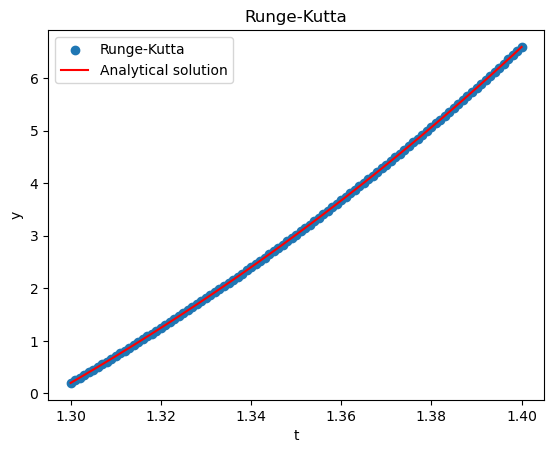

In [115]:
plt.scatter(history[:,0],history[:,1],label="Runge-Kutta")
plt.plot(history[:,0],analytical_f(history[:,0]),"r",label="Analytical solution")
plt.xlabel('t')
plt.ylabel('y')
plt.title("Runge-Kutta")
plt.legend()
plt.show()

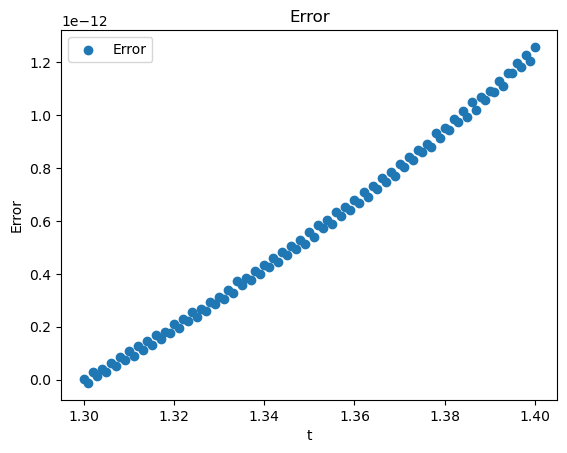

In [116]:
#誤差のグラフの描画
cm.plot_error(history,analytical_f)